# Neural Networks

The fundamental building block of neural networks are *neurons* or layers of neurons which allow for deep-layer architectures to learn complex functions associated with more complex data. A neuron is essentially a unit which computes and learns the optimal parameters for an *activation function* in such a way so as to minimize the total loss of the network as a whole given the dataset. This demonstrates an application of simple feedforward neural networks.

## Architecture and Notation
The architecture of a deep neural network is composed of *layers* of neurons. Let $l\in[0,\ldots,L]$ denote the index of a particular layer where $l=0$ denotes the *input* layer and $l=L$ denotes the output layer. The $l$-lth layer is denoted to have $n_{l}$ neurons. The *hidden* layers represent layers $l\in[1,\ldots,L-1]$.

The activations of all neurons in a layer are denoted by $a^{[l]}\in\mathbb{R}^{n_l}$. individual neurons are denoted as $a_j^{[l]}$ where $j\in[1,\ldots,n_{l}]$.

The connections of neurons are described by the *weight matrix* $w^{[l]}\in\mathbb{R}^{n_{l}\times n_{l+1}}$, where $w^{(l)}_{j,k}$ denotes the connection of the $j$-th neuron for $j\in[1,\ldots,n_l]$, the previous layer, to the $k$-th neuron for $k\in[1,\ldots,n_{l+1}]$, the next layer. The bias is also a vector, $b\in\mathbb{R}^{n_{l+1}}$.

The activation of a layer $l$ is computed as the output of the activation function $g(z^{[l]})$ whose input $z^{[l]}$ is a linear combination of the activations of the previous layer with the weights $w^{[l]}$, i.e,

$$
    z^{[l]}=w^\top a^{[l-1]}+b\quad\text{and}\quad a^{[l]}=g(z^{[l]})
$$

## Activation Function

The activation function $g(z)$ for neural networks represents a nonlinear output or signal from a neuron given it's inputs. Common choices for these activation functions vary depending on the application but the ones typically used for the hidden layers are the **ReLU**, denoted as $\text{ReLU}(z)$ and **sigmoid**, denoted here as $\sigma(z)$
$$
\text{ReLU}(z)=\max(0,z)\quad\text{and}\quad\sigma(z)=\frac{1}{1+e^{-z}}
$$

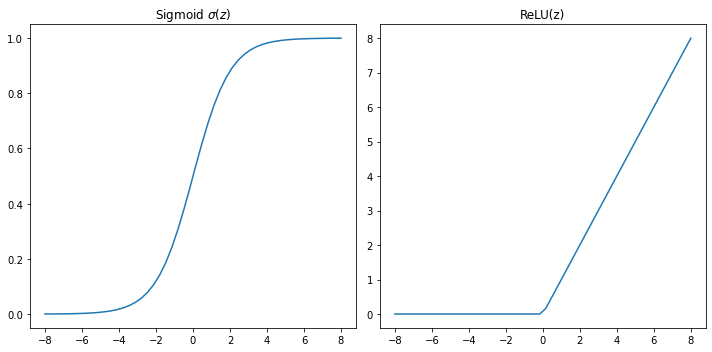

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x    = np.linspace(-8.0, 8.0)
relu = np.maximum(0, x)
sig  = 1 / (1 + np.exp(-x))

fig, ax = plt.subplots(1, 2)
fig.set_size_inches((10, 5))
ax[0].plot(x, sig)
ax[0].set_title('Sigmoid $\sigma(z)$')
ax[1].plot(x, relu)
ax[1].set_title('ReLU(z)')
plt.tight_layout()
plt.show()

But why must the activation function be nonlinear in the first place? Suppose that the activation function *was* linear, e.g., the identity function, simply the output of $z^{[l]}$. The bias vector is removed for simplification.
$$
a^{[l]}=z^{[l]}=w^{[l]\top}a^{[l-1]}
$$
Note that $a^{[l-1]}$ can then be expanded as,
$$
\begin{align*}
a^{[l]}
&=w^{[l]\top}\left(w^{[l-1]\top}a^{[l-2]}\right)\\
&=(w^{[l]\top}w^{[l-1]\top})a^{[l-2]}\\
&=(w^{[l]\top}w^{[l-1]\top})\left(w^{[l-2]\top}a^{[l-3]}\right)\\
&=(w^{[l]\top}w^{[l-1]\top}w^{[l-2]\top})a^{[l-3]}\\
&=(w^{[l]\top}w^{[l-1]\top}w^{[l-2]\top}\ldots w^{[1]\top})a^{[0]}
\end{align*}
$$
The entire model reduces down to a linear function of the input activation $a^{[0]}$,
$$
a^{[L]}=Wa^{[0]}
$$
Where $W$ is the product of all the matrices,
$$
W=\left(w^{[L]\top}w^{[L-1]\top}w^{[L-2]\top}\ldots w^{[1]\top}\right)
$$
This removes any ability for the model to learn more complex nonlinear relationships as seen in real-world data as the underlying assumption that the model makes is that the data can be represented as a linear function of the inputs.

It is also useful later on to determine the derivatives of the activation functions such as $\sigma(z)$ and $\text{ReLU}(z)$. As previously shown, the derivative of the logistic or sigmoid function is,
$$
\frac{d\sigma(z)}{dz}=\sigma(z)\left(1-\sigma(z)\right)
$$

On the other hand, to find the derivative of $\text{ReLU}(z)$, it helps to consider its definition as a piecewise function
$$
\text{ReLU}(z)=\begin{cases}
    0 & z \leq 0 \\
    x & z > 0
\end{cases}
$$
This provides the definition of the derivative of $\text{ReLU}(z)$, noting that since the derivatives do not approach the same value from both sides as $z\to 0$, then the derivative of $\text{ReLU}(z)$ at $z=0$ is $\text{undefined}$. In practice, this is very rare and many software implementations typically define it arbitrarily such as $0$ or $1$.
$$
\frac{d\text{ReLU}(z)}{dz}=\begin{cases}
    0 & z < 0 \\
    1 & z > 0 \\
    \text{undefined} & z = 0
\end{cases}
$$

## Forward Propagation

The forward propagation phase is simply carrying out the sequential output of the network given its current configurations of parameters $w^{[l]}$ and $b^{[l]}$

$$
\begin{align*}
z^{[1]}&=w^{[1]\top}a^{[0]}+b^{[1]}\\
a^{[1]}&=g(z^{[1]})\\
z^{[2]}&=w^{[2]\top}a^{[1]}+b^{[2]}\\
a^{[2]}&=g(z^{[2]})\\
z^{[3]}&=w^{[3]\top}a^{[2]}+b^{[3]}\\
a^{[3]}&=g(z^{[3]})\\
&\vdots\\
z^{[L]}&=w^{[L]\top}a^{[L-1]}+b^{[L]}\\
a^{[L]}&=g(z^{[L]})
\end{align*}
$$

In a supervised learning task, the outputs of the final layer $a^{[L]}$ would then represent the predicted value $\hat{y}$ and carrying out the learning process requires finding out the cost given the current parameters on the training set.

Similar to before, the model learns the optimal parameters $w^{[l]}$ and $b^{[l]}$ so as to minimize the cost function $J(w^{[0]},b^{[0]},w^{[1]},b^{[1]},\ldots)$, where all parameters will be denoted simply as $J(W)$. The optimal parameters are denoted as $W^*$. In a supervised learning model, this can still be defined similar to before.
$$
W^{*}=\min_{W}J(W)=\min_{W}\frac{1}{m}\sum_{i=1}^{m}L(\hat{y}^{(i)},y^{(i)})
$$

The loss function $L(\hat{y}^{(i)},y^{(i)})$ still depends on the problem, but for this case, the binary classification task necessitates the use of the binary cross-entropy loss
$$
L(\hat{y}^{(i)},y^{(i)})=-\left(y^{(i)}\log(\hat{y}^{(i)})+(1-y^{(i)})\log(1-\hat{y}^{(i)}\right)
$$

The algorithm for training remains similar to before. But for neural networks, it is necessary to carry out *gradient descent* with *backpropagation*.

## Backpropagation

After the cost is computed it comes necessary to compute the gradients of the cost w.r.t the parameters $w^{[l]}$ and $b^{[l]}$ for all $l\in[1,\ldots,L]$. 

The idea behind backpropagation is that the gradients are computed starting from the outputs of the last layer $l=L$, after which gradients are propagated backwards. It is necessary to calculate and propagate backwards because of the *chain rule*. 

In order to simplify the calculations, subsequent derivations calculated the gradient of the *loss* of any training example. As an example, given a particular weight $w^{[l]}_{j,k}$
$$
\nabla_{w^{[l]}_{j,k}}L(\hat{y}^{(i)},y^{(i)})\
=\frac{\partial L(\hat{y}^{(i)},y^{(i)})}{\partial w^{[l]}_{j,k}}
=\frac{\partial L(\hat{y}^{(i)},y^{(i)})}{\partial a^{[l]}_k}\cdot\frac{\partial a^{[l]}_k}{\partial w^{[l]}_{j,k}}
$$

The first factor is a component of $\frac{\partial J(W)}{\partial a^{[l]}}$, the *gradient* propagated backwards from layers that come after layer $l$. In order to simplify the calculations of the gradient, the aforementioned *upstream* gradient will be denoted as
$$
\delta^{[l]}=\nabla_{a^{[l]}}L(\hat{y}^{(i)},y^{(i)})
=\begin{bmatrix}
    \frac{\partial L(\hat{y}^{(i)},y^{(i)})}{\partial a^{[l]}_1}, & \frac{\partial L(\hat{y}^{(i)},y^{(i)})}{\partial a^{[l]}_2}, & \dots, & \frac{\partial L(\hat{y}^{(i)},y^{(i)})}{\partial a^{[l]}_{n_l}}
\end{bmatrix}^\top
$$
Note that since $a^{[l]}_k$ can affect the activations of all other neurons in layer $l+1$, a complete definition of $\delta^{[l]}_k$ is
$$
\begin{align*}
\delta^{[l]}_k
&=\sum_{j=1}^{n_{l+1}}\frac{\partial L(\hat{y}^{(i)},y^{(i)})}{a^{[l+1]}_j}\cdot\frac{\partial a^{[l+1]}_j}{a^{[l]}_k}\\
&=\sum_{j=1}^{n_{l+1}}\delta^{[l+1]}_j\cdot\frac{\partial a^{[l+1]}_j}{a^{[l]}_k}\\
\end{align*}
$$

A particular weight $w^{[l]}_{j,k}$, the gradient of the loss w.r.t such weight was previously defined as,
$$
\begin{align*}
\frac{\partial L(\hat{y}^{(i)},y^{(i)})}{\partial w^{[l]}_{j,k}}
&=\delta^{[l]}_k\cdot\frac{\partial a^{[l]}_k}{\partial w^{[l]}_{j,k}}\\
&=\delta^{[l]}_k\cdot\frac{\partial a^{[l]}_k}{\partial z^{[l]}_k}\cdot\frac{\partial z^{[l]}_k}{\partial w^{[l]}_{j,k}}
\end{align*}
$$

Recall from the definition of $z^{[l]}_k$,
$$
z^{[l]}_k=w^{[l]}_{1,1}a^{[l-1]}_1+\dots+w^{[l]}_{j,k}a^{[l-1]}_j+\dots+b_k
$$

Thus the partial of $z^{[l]}_k$ w.r.t $w^{[l]}_{j,k}$,
$$
\frac{\partial z^{[l]}_k}{\partial w^{[l]}_{j,k}}=a^{[l-1]}_j
$$
This holds for any $k\in[1,\ldots,n_{l}]$, thus the gradient of $z^{[l]}$ w.r.t $w^{[l]}$ can be determined by carrying out the rest of the calculation of the partial derivatives,
$$
\nabla_{w^{[l]}}z^{[l]}
=\begin{bmatrix}
    a^{[l-1]}_1 & \dots & a^{[l-1]}_1 \\
    \vdots & \ddots & \vdots \\
    a^{[l-1]}_{n_{l-1}} & \dots & a^{[l-1]}_{n_{l-1}} \\
\end{bmatrix}
$$
The gradient of $a^{[l]}$ w.r.t $z^{[l]}$ is essentially the derivative of the respective activation function $g'(z^{[l]})$
$$
\nabla_{z^{[l]}}a^{[l]}
=g'(z^{[l]})=\begin{bmatrix}g'(z^{[l]}_1), & \dots, & g'(z^{[l]}_{n_l})\end{bmatrix}^\top
$$
Thus the gradient of the loss w.r.t the weight becomes $w^{[l]}_{j,k}$,
$$
\frac{\partial L(\hat{y}^{(i)},y^{(i)})}{\partial w^{[l]}_{j,k}}
=\delta^{[l]}_k\cdot g'(z^{[l]}_k)\cdot a^{[l-1]}_j
$$
Likewise, the gradient of the loss w.r.t the bias $b^{[l]}_k$ is
$$
\frac{\partial L(\hat{y}^{(i)},y^{(i)})}{\partial b^{[l]}_k}
=\delta^{[l]}_k\cdot g'(z^{[l]}_k)
$$

It is also important to find the gradient of the loss w.r.t the *activations* of the previous layer, i.e, $\delta^{[l-1]}$ as this is necessary for the backpropagation.
$$
\begin{align*}
\delta^{[l-1]}_j
&=\sum_{k=1}^{n_l}\delta^{[l]}_k\cdot\frac{\partial a^{[l]}_k}{z^{[l]}_k}\cdot\frac{\partial z^{[l]}_k}{\partial a^{[l-1]}_j}\\
&=\sum_{k=1}^{n_l}\delta^{[l]}_k\cdot g'(z^{[l]}_k)\cdot\frac{\partial z^{[l]}_k}{\partial a^{[l-1]}_j}
\end{align*}
$$

Recall from the definition of $z^{[l]}_k$,
$$
z^{[l]}_k=w^{[l]}_{1,1}a^{[l-1]}_1+\dots+w^{[l]}_{j,k}a^{[l-1]}_j+\dots+b_k
$$

Thus the partial of $z^{[l]}_k$ w.r.t to an activation $a^{[l-1]}_j$ is,
$$
\frac{\partial z^{[l]}_k}{\partial a^{[l-1]}_k}=w^{[l]}_{j,k}
$$

And $\delta^{[l-1]}_j$ for $j\in[1,\dots,n_{l-1}]$ becomes
$$
\delta^{[l-1]}_j=\sum_{k=1}^{n_l}\delta^{[l]}_k\cdot g'(z^{[l]}_k)\cdot w^{[l]}_{j,k}
$$

## Vectorized Implementation

As before, it is more efficient to carry out a vectorized implementation as opposed to solely relying on loops. While it is not possible to vectorize across multiple layers given the presence of the nonlinear activation function, it is possible to compute all of the activations of neurons on the *entire training set* for a particular layer.

As before let $X^{[0]}\in\mathbb{R}^{n\times m}$ be the design matrix containing all of the $m$ training examples, each with $n$ input features. The weight matrix for a particular layer $w^{[l]}\in\mathbb{R}^{n_l\times n_{l+1}}$ is defined similarly to before. The dummy feature would not be used for now as it requires an additional row of $1$'s to each layer for every layer computation.
$$
X^{[0]}=\begin{bmatrix}
x^{(1)}_1, & \dots  & x^{(m)}_1 \\
 \vdots   & \ddots & \vdots \\
x^{(1)}_n, & \dots  & x^{(m)}_n
\end{bmatrix}
\quad
w^{[l]}=\begin{bmatrix}
w^{[l]}_{1, 1}, & \dots & w^{[l]}_{1, n_{l+1}} \\
\vdots   & \ddots & \vdots \\
w^{[l]}_{n_l, 1}, & \dots & w^{[l]}_{n_l, n_{l+1}} \\
\end{bmatrix}
\quad
b^{[l]}=\begin{bmatrix}b^{[l]}_1 \\\vdots \\b^{[l]}_{n_{l+1}}\end{bmatrix}
$$

The linear combinations of all the inputs in a particular layer $l$ with the weights, denoted by $Z^{[l]}$, and the subsequent activations of the neurons, denoted as $A^{[l]}$ for all training examples can then be calculated as
$$
\begin{align*}
Z^{[l]}&=w^{[l]\top}X^{[l-1]}+b^{[l]}\\
A^{[l]}&=g(Z^{[l]})
\end{align*}
$$

The activations of the output layer $A^{[L]}$ can then be used to calculate the loss given the $Y$ matrix, $L(A^{[L]}, Y)$. After which $\delta^{[L]}$ can then be computed. Both these computations will vary depending on the loss function,
$$
\delta^{[L]}=\frac{\partial L\left(A^{[L]}, Y\right)}{\partial A^{[L]}}
$$

Note that because $A^{[L]}$ and $Y$ are both matrices in $\mathbb{R}^{n_L\times m}$, the same is true for $\delta^{[L]}$

The gradients of the activation function, $g'(Z^{[l]})$, and $\delta^{[l]}$ being defined as follows,
$$
g'(Z^{[l]})
=\begin{bmatrix}
g'(z^{[l]}_{1,1}), & \dots & g'(z^{[l]}_{1,m}) \\
\vdots & \ddots & \vdots \\
g'(z^{[l]}_{n_l,1}), & \dots & g'(z^{[l]}_{n_l,m}) \\
\end{bmatrix}
\qquad
\delta^{[l]}
=\begin{bmatrix}
\delta^{[l]}_{1,1}, & \dots & \delta^{[l]}_{1,m} \\
\vdots & \ddots & \vdots \\
\delta^{[l]}_{n_l,1}, & \dots & \delta^{[l]}_{n_l,m} \\
\end{bmatrix}
$$
Taking the element-wise product leads to the resulting matrix in still $\mathbb{R}^{n_l\times m}$ since both are only multiplied element-wise,
$$
\delta^{[l]}\odot g'(Z^{[l]})
=\begin{bmatrix}
\delta^{[l]}_{1,1}\cdot g'(z^{[l]}_{1,1}), & \dots & \delta^{[l]}_{1,m}\cdot g'(z^{[l]}_{1,m}) \\
\vdots & \ddots & \vdots \\
\delta^{[l]}_{n_l,1}\cdot g'(z^{[l]}_{n_l,1}), & \dots & \delta^{[l]}_{n_l,m}\cdot g'(z^{[l]}_{n_l,m}) \\
\end{bmatrix}
$$

### Calculating the gradients for layer weights
Recall that $X^{[l-1]}\in\mathbb{R}^{n_{l-1}\times m}$ is defined as,
$$
X^{[l-1]}
=\begin{bmatrix}
a^{[l-1]}_{1,1}, & \dots & a^{[l-1]}_{1,m} \\
\vdots & \ddots & \vdots \\
a^{[l-1]}_{n_{l-1},1}, & \dots & a^{[l-1]}_{n_{l-1},m} \\
\end{bmatrix}
$$

The gradient of the *cost* (since the matrices already include all training samples) w.r.t the weights can then be calculated as
$$
\nabla_{w^{[l]}}J(W)=\frac{X^{[l-1]}\left(g'(Z^{[l]})\odot\delta^{[l]}\right)^\top}{m}
$$

To see that this is valid, note that each component of this gradient is defined as
$$
\nabla_{w^{[l]}}J(W)_{j,k}=\frac{1}{m}\sum_{i=1}^{m}\delta^{[l-1]}_{k,i}\cdot g'(z^{[l-1]}_{k,i})\cdot a^{[l-1]}_{j,i}
$$

### Calculating the gradients for layer biases
Likewise, the gradient of the cost w.r.t the bias $\nabla_{b^{[l]}}J(W)\in\mathbb{R}^{n_l}$ is simply the **mean** of $\delta^{[l]}\odot g'(Z^{[l]})$ along its **rows**, i.e,
$$
\quad\nabla_{b^{[l]}}J(W)_k
=\frac{1}{m}\sum_{i=1}^{m}\left(\delta^{[l]}\odot g'(Z^{[l]})\right)_{k,i}
$$

### Calculating the gradients for subsequent backpropagation
For the gradients to be passed to the previous layer for backpropagation, recall the definition of $w^{[l]}\in\mathbb{R}^{n_{l-1}\times n_l}$
$$
w^{[l]}
=\begin{bmatrix}
w^{[l]}_{1, 1}, & \dots & w^{[l]}_{1, n_l} \\
\vdots & \ddots & \vdots \\
w^{[l]}_{n_{l-1}, 1}, & \dots & w^{[l]}_{n_{l-1}, n_l}
\end{bmatrix}
$$

The gradients for the previous layer can then be calculated as $\delta^{[l-1]}$,
$$
\delta^{[l-1]}=w^{[l]}\left(\delta^{[l]}\odot g'(Z^{[l]})\right)
$$

To see that this is valid, note that each element $\delta^{[l-1]}_{j,i}$ for $j\in[1,\ldots,n_l]$ and $i\in[1,\ldots,m]$ is defined as
$$
\delta^{[l-1]}_{j,i}=\sum_{k=1}^{n_{l}}\delta^{[l]}_{k,i}\cdot g'(z^{[l]}_{k,i})\cdot w^{[l]}_{j,k}
$$

## Implementation

The `make_circles` dataset generator from `scikit-learn` will be used for this example. Although logistic regression with engineered features can be sufficient for this problem, this is simply for the demonstration of neural networks.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.utils import shuffle
from sklearn.datasets import make_classification

np.random.seed(0)

In [3]:
x1, y1 = make_circles(factor = 0.8, noise = 0.01, random_state=32)

X_data = x1
Y_data = y1.reshape(-1, 1)

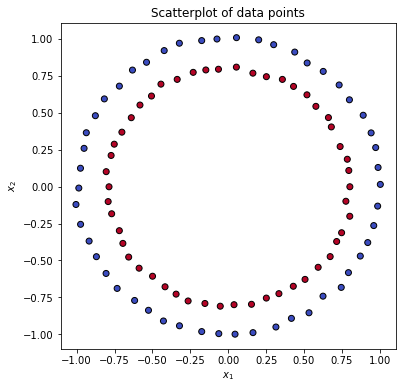

In [4]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(x = X_data[:, 0], y = X_data[:, 1], c = Y_data, cmap = 'coolwarm', edgecolors='black')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Scatterplot of data points')
plt.show()

In [5]:
X_data.shape, Y_data.shape

((100, 2), (100, 1))

In [6]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

In [7]:
X = X_data.T
Y = Y_data.T

In [8]:
X.shape, Y.shape

((2, 100), (1, 100))

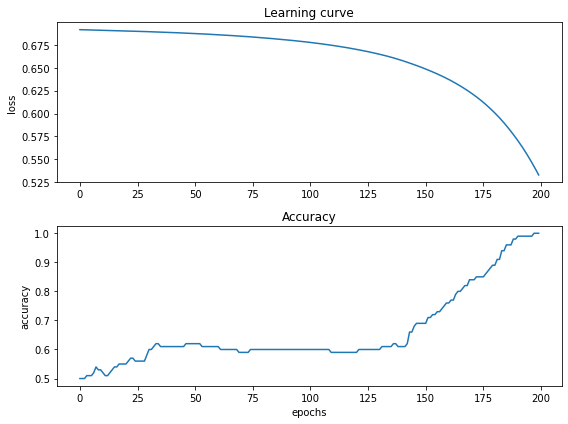

In [9]:
class NeuralNetwork:
    def __init__(self, layer_sizes, activations, loss_function):
        self.weights = [ np.random.randn(layer_sizes[idx], n) * (1.0 / np.sqrt(2.0 * layer_sizes[idx]))
                         for idx, n in enumerate(layer_sizes[1:]) ]
        self.biases  = [ np.zeros((n, 1)) for n in layer_sizes[1:] ]
        self.layer_activations = activations
        
        self.activation = {
            'sigmoid': lambda z : 1 / (1 + np.exp(-z)),
            'relu'   : lambda z : np.maximum(0, z)
        }
        self.activation_prime = {
            'sigmoid': lambda a_out, z_out : a_out * (1 - a_out),
            'relu'   : lambda a_out, z_out : a_out > 0.0
        }
        self.losses_func = {
            'binary_crossentropy': lambda y_pred, y_true: -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        }
        
        self.losses_prime = {
            'binary_crossentropy': lambda y_pred, y_true: (y_pred - y_true) / (y_pred * (1 - y_pred))
        }
        self.metrics_func = {
            'binary_class_accuracy': lambda y_pred, y_true: np.mean(np.round(y_pred) == y_true)
        }
        
        self.loss_func  = self.losses_func[loss_function]
        self.loss_prime = self.losses_prime[loss_function] 
        
    def train(self, train_X, train_Y, num_epochs, learning_rate, metrics = None):
        len_ds = train_X.shape[1]
        
        loss_hist    = [ 0 for x in range(num_epochs) ]
        metrics_hist = { m : [] for m in metrics } 
        
        for epoch in range(num_epochs):
            z_outs = [ train_X ]
            a_outs = [ train_X ]
        
            # Forward pass
            for idx, (weights, biases) in enumerate(zip(self.weights, self.biases)):
                g_func = self.activation[self.layer_activations[idx]]
                Z_prev = a_outs[idx]
                Z_next = np.dot(weights.T, Z_prev) + biases
                A_next = g_func(Z_next)
                
                z_outs.append(Z_next)
                a_outs.append(A_next)
                
            # Compute loss
            loss = np.mean(self.loss_func(a_outs[-1], train_Y))
            loss_hist[epoch] = loss
            
            for metric in metrics:
                metrics_hist[metric].append(self.metrics_func[metric](a_outs[-1], train_Y))
            
            # Backward pass
            dLoss_dAs = [ self.loss_prime(a_outs[-1], train_Y) ]
            
            dLoss_dws = []
            dLoss_dbs = []
            
            for idx in reversed(range(len(self.weights))):
                a_curr = a_outs[idx + 1]
                z_curr = z_outs[idx + 1]
                a_prev = a_outs[idx]
                
                g_prime  = self.activation_prime[self.layer_activations[idx]]
                dLoss_dZ = dLoss_dAs[len(self.weights) - 1 - idx] * g_prime(a_curr, z_curr)
                
                dLoss_dw = np.dot(a_prev, dLoss_dZ.T) / len_ds
                dLoss_db = np.mean(dLoss_dZ, axis = 1, keepdims = True)
                
                dLoss_dws.insert(0, dLoss_dw)
                dLoss_dbs.insert(0, dLoss_db)
                
                dLoss_dAprev = np.dot(self.weights[idx], dLoss_dZ)
                dLoss_dAs.append(dLoss_dAprev)
            
            # Update step
            for idx in range(len(self.weights)):
                self.weights[idx] = self.weights[idx] - (dLoss_dws[idx] * learning_rate)
                self.biases[idx]  = self.biases[idx]  - (dLoss_dbs[idx] * learning_rate)
            
        return loss_hist, metrics_hist
    
    def predict(self, test_X):
        z_outs = test_X
        a_outs = test_X
        
        for idx, (weights, biases) in enumerate(zip(self.weights, self.biases)):
            g_func = self.activation[self.layer_activations[idx]]
            Z_prev = a_outs
            Z_next = np.dot(weights.T, Z_prev) + biases
            A_next = g_func(Z_next)

            z_outs = Z_next
            a_outs = A_next
                
        return a_outs[-1]

nn = NeuralNetwork([2, 32, 32, 32, 1], ['relu', 'relu', 'relu', 'sigmoid'], 'binary_crossentropy')
loss_hist, metrics_hist = nn.train(X, Y, num_epochs = 200, learning_rate = 0.25, metrics = ['binary_class_accuracy'])


fig, ax = plt.subplots(2, 1)
fig.set_size_inches((8, 6))
ax[0].plot(loss_hist)
ax[0].set_title('Learning curve')
ax[0].set_ylabel('loss')
ax[1].set_title('Accuracy')
ax[1].plot(metrics_hist['binary_class_accuracy'])
ax[1].set_ylabel('accuracy')
plt.xlabel('epochs')
plt.tight_layout()
plt.show()

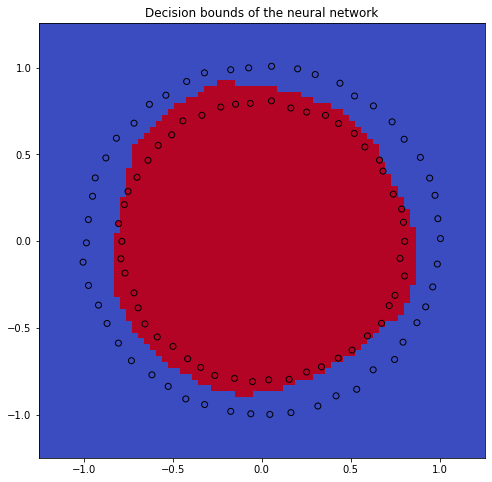

In [10]:
x1_min = np.min(X.T[:, 0]) - 0.25
x1_max = np.max(X.T[:, 0]) + 0.25
x2_min = np.min(X.T[:, 1]) - 0.25
x2_max = np.max(X.T[:, 1]) + 0.25

(x1_min, x1_max), (x2_min, x2_max)
x1   = np.linspace(x1_min, x1_max, 75)
x2   = np.linspace(x2_min, x2_max, 75)
pred_data = np.array([ (x, y) for y in x2 for x in x1 ]).T

yp = nn.predict(pred_data)

pred = np.row_stack([pred_data, np.round(yp)]).T

fig, ax = plt.subplots()
fig.set_size_inches((8, 8))
ax.scatter(pred[:, 0], pred[:, 1], c = pred[:, 2], marker = ',', cmap = 'coolwarm')
ax.scatter(X.T[:, 0], X.T[:, 1], c = Y.T, marker = 'o',  cmap = 'coolwarm', edgecolors='black')
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title('Decision bounds of the neural network')
plt.show()